### Student Information
Name: 吳文婷

Student ID: d301111002  

GitHu ID: Jillwu0506  

Kaggl name: JillwuTMU

Kaggle private scoreboard snapshot:
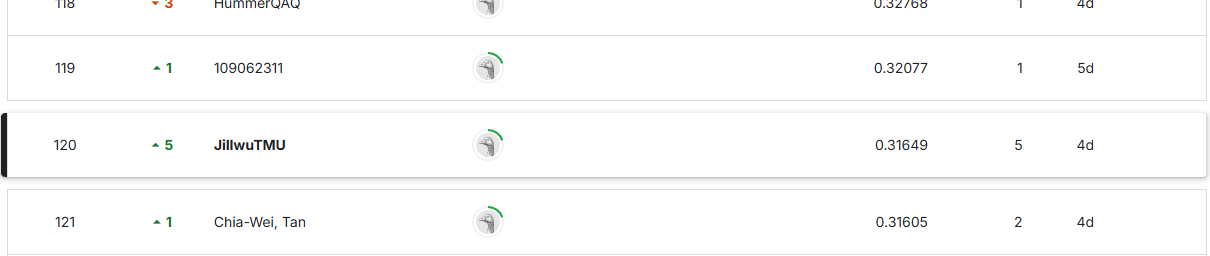snapshot:

In [1]:
%%capture
#Remove %%capture if you want to see the output
!pip3 install scikit-learn --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade
!pip3 install plotly --upgrade
!pip3 install seaborn --upgrade
!pip3 install nltk --upgrade
!pip3 install umap-learn --upgrade

!pip3 install gensim --upgrade
#!pip3 install tensorflow --upgrade
!pip3 install tensorflow==2.17.0
#!pip3 install keras --upgrade
!pip3 install keras==3.6.0

!pip3 install ollama --upgrade
!pip3 install langchain --upgrade
!pip3 install langchain_community --upgrade
!pip3 install langchain_core --upgrade
!pip3 install beautifulsoup4 --upgrade
!pip3 install chromadb --upgrade
!pip3 install gradio --upgrade

In [2]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [3]:
%%capture
#Remove %%capture if you want to see the output
#Download model llama 3.2:1b

!ollama pull llama3.2:1b

time=2024-12-08T09:38:22.880Z level=INFO source=common.go:49 msg="Dynamic LLM libraries" runners="[cuda_v11 cuda_v12 rocm cpu cpu_avx cpu_avx2]"
time=2024-12-08T09:38:22.880Z level=INFO source=gpu.go:221 msg="looking for compatible GPUs"
time=2024-12-08T09:38:23.261Z level=INFO source=types.go:123 msg="inference compute" id=GPU-401d4841-c662-ce8c-49d7-0e62e2912edf library=cuda variant=v12 compute=7.5 driver=12.6 name="Tesla T4" total="14.7 GiB" available="14.6 GiB"
time=2024-12-08T09:38:23.261Z level=INFO source=types.go:123 msg="inference compute" id=GPU-c0af4b92-2a05-a05f-d97c-926720b53e72 library=cuda variant=v12 compute=7.5 driver=12.6 name="Tesla T4" total="14.7 GiB" available="14.6 GiB"


[GIN] 2024/12/08 - 09:38:23 | 200 |      45.975µs |       127.0.0.1 | HEAD     "/"


time=2024-12-08T09:38:24.875Z level=INFO source=download.go:175 msg="downloading 74701a8c35f6 in 14 100 MB part(s)"
time=2024-12-08T09:38:28.609Z level=INFO source=download.go:175 msg="downloading 966de95ca8a6 in 1 1.4 KB part(s)"
time=2024-12-08T09:38:30.400Z level=INFO source=download.go:175 msg="downloading fcc5a6bec9da in 1 7.7 KB part(s)"
time=2024-12-08T09:38:32.094Z level=INFO source=download.go:175 msg="downloading a70ff7e570d9 in 1 6.0 KB part(s)"
time=2024-12-08T09:38:33.787Z level=INFO source=download.go:175 msg="downloading 4f659a1e86d7 in 1 485 B part(s)"


[GIN] 2024/12/08 - 09:38:39 | 200 | 15.404893934s |       127.0.0.1 | POST     "/api/pull"


In [4]:
%%capture
#Remove %%capture if you want to see the output
#Download model llama 3.2
 
!ollama pull llama3.2

[GIN] 2024/12/08 - 09:38:40 | 200 |      32.906µs |       127.0.0.1 | HEAD     "/"


time=2024-12-08T09:38:41.311Z level=INFO source=download.go:175 msg="downloading dde5aa3fc5ff in 16 126 MB part(s)"
time=2024-12-08T09:38:49.019Z level=INFO source=download.go:175 msg="downloading 56bb8bd477a5 in 1 96 B part(s)"
time=2024-12-08T09:38:50.692Z level=INFO source=download.go:175 msg="downloading 34bb5ab01051 in 1 561 B part(s)"


[GIN] 2024/12/08 - 09:38:59 | 200 | 18.669104554s |       127.0.0.1 | POST     "/api/pull"


In [5]:
%%capture
#Remove %%capture if you want to see the output
#Download model llava-phi3
 
!ollama pull llava-phi3

[GIN] 2024/12/08 - 09:39:00 | 200 |      32.561µs |       127.0.0.1 | HEAD     "/"


time=2024-12-08T09:39:01.286Z level=INFO source=download.go:175 msg="downloading 377876be20ba in 16 144 MB part(s)"
time=2024-12-08T09:39:06.322Z level=INFO source=download.go:175 msg="downloading 004fc0969720 in 7 100 MB part(s)"
time=2024-12-08T09:39:09.122Z level=INFO source=download.go:175 msg="downloading c608dc615584 in 1 149 B part(s)"
time=2024-12-08T09:39:11.707Z level=INFO source=download.go:175 msg="downloading cadf483f03b5 in 1 155 B part(s)"
time=2024-12-08T09:39:13.419Z level=INFO source=download.go:175 msg="downloading 3921dac664c1 in 1 492 B part(s)"


[GIN] 2024/12/08 - 09:39:25 | 200 | 24.852939908s |       127.0.0.1 | POST     "/api/pull"


## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [6]:
import pandas as pd

### training data
anger_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [7]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [8]:
### testing data
anger_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [9]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


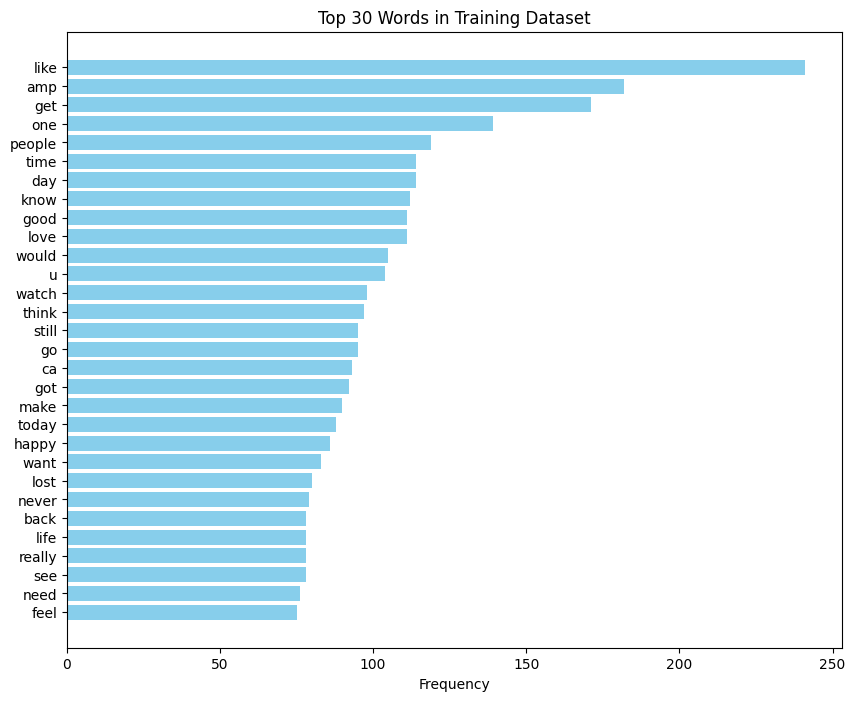

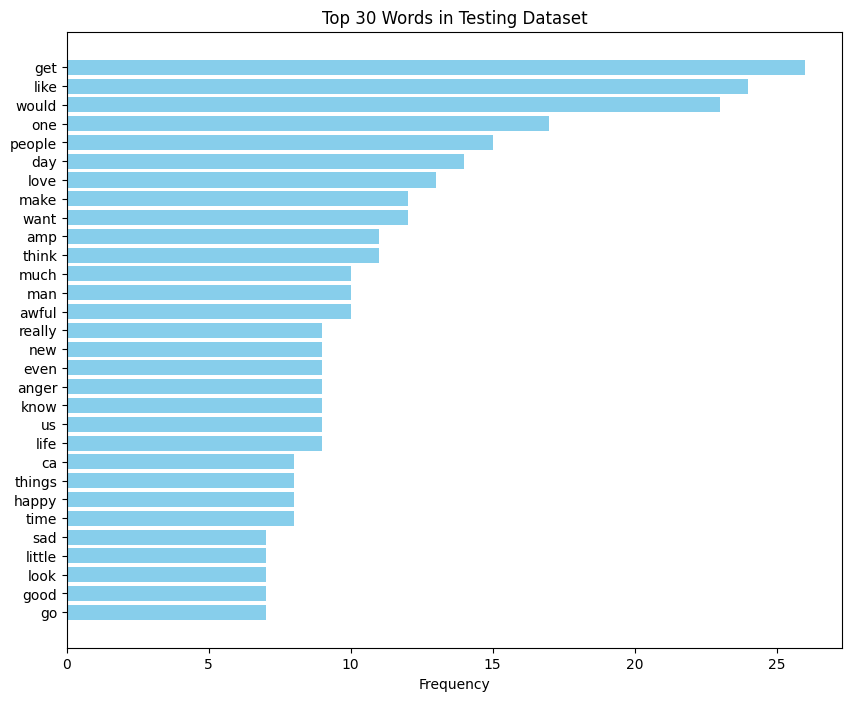

In [10]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# 定義一個函數來計算詞頻
def get_word_frequency(text_series):
    stop_words = set(stopwords.words('english'))
    all_words = []
    for text in text_series:
        words = word_tokenize(text.lower())
        words = [word for word in words if word.isalnum() and word not in stop_words]
        all_words.extend(words)
    return Counter(all_words)

# 計算詞頻
train_word_freq = get_word_frequency(train_df['text'])
test_word_freq = get_word_frequency(test_df['text'])

# 取得前 30 個詞
train_top_30 = train_word_freq.most_common(30)
test_top_30 = test_word_freq.most_common(30)

# 繪製詞頻圖
def plot_word_frequency(word_freq, title):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10, 8))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

plot_word_frequency(train_top_30, 'Top 30 Words in Training Dataset')
plot_word_frequency(test_top_30, 'Top 30 Words in Testing Dataset')

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [13]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [14]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[1005:1015]

array(['becz', 'bed', 'beds', 'bedtime', 'bee', 'beef', 'been', 'beer',
       'beetuppy', 'before'], dtype=object)

In [15]:
"😂" in feature_names

False

In [16]:
import nltk
# Download punkt
try:
    nltk.data.find('punkt_tab')
except:
    nltk.download('punkt_tab', download_dir='/kaggle/working/')
    nltk.data.path.append('/kaggle/working/')
  
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /kaggle/working/...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [17]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'come',
       'comes', 'could', 'country', 'cry'], dtype=object)

In [18]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 使用 TfidfVectorizer 生成 TF-IDF 嵌入
vectorizer = TfidfVectorizer(max_features=1000)
train_data_tfidf_matrix_1000 = vectorizer.fit_transform(train_df['text'])

In [20]:
# 獲取特徵名稱
feature_names_1000 = vectorizer.get_feature_names_out()
feature_names_1000[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

In [21]:
"😂" in feature_names_1000

False

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [23]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'fear', 'anger', 'joy', 'anger', 'fear', 'anger',
       'fear', 'anger', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [24]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [25]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.62      0.71      0.67        84
        fear       0.67      0.63      0.65       110
         joy       0.74      0.67      0.70        79
     sadness       0.62      0.64      0.63        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [26]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[60 11  7  6]
 [20 69  7 14]
 [ 6 11 53  9]
 [10 12  5 47]]


In [27]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

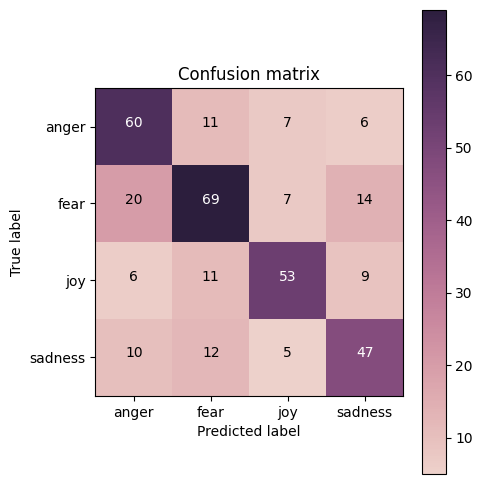

In [28]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

## Answer
The model's prediction accuracy is 0.67. Among the four emotions, anger has the best predictive F1 score of 0.71. From the confusion matrix, we can see the proportion of each misclassification and which emotion they are misclassified into. For example, a higher proportion is misclassified as fear, possibly due to data imbalance. It is also observed that sadness and fear are easily confused in the model's predictions. We can try using different feature engineering techniques to improve the model's classification ability.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# 訓練 Naive Bayes 模型
model = MultinomialNB()
model.fit(X_train, y_train)

# 預測測試集
y_pred = model.predict(X_test)

In [30]:
# 計算混淆矩陣和分類報告
cm_Naive_Bayes = confusion_matrix(y_test, y_pred)
report_Naive_Bayes = classification_report(y_test, y_pred)
accuracy_Naive_Bayes = accuracy_score(y_test, y_pred)

print(report_Naive_Bayes)
print(accuracy_Naive_Bayes)

              precision    recall  f1-score   support

       anger       0.65      0.67      0.66        84
        fear       0.74      0.81      0.77       110
         joy       0.77      0.70      0.73        79
     sadness       0.66      0.62      0.64        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347

0.7089337175792507


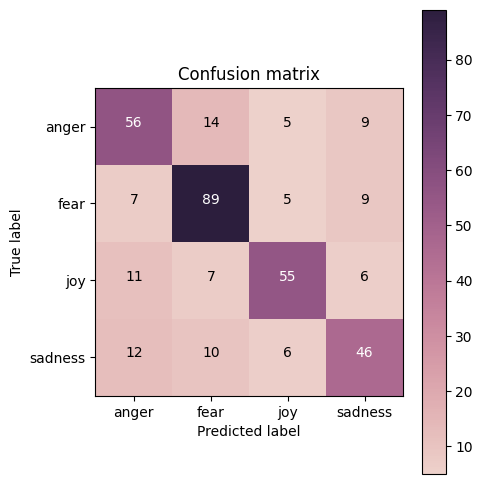

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_Naive_Bayes, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

## Answer
The Naive Bayes model's prediction accuracy of 0.71 is better than the Decision Tree model. The recall and F1 scores have increased in the fear and joy groups. However, for sadness and anger, this model shows lower prediction performance compared to the Decision Tree model.

The Naive Bayes model, based on feature independence assumption, performs efficiently in high-dimensional data and text classification tasks with good robustness for imbalanced data through conditional probability calculations

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

### 6.1 Prepare data (X, y)

In [32]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

2024-12-08 09:39:38.161397: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-08 09:39:38.195366: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-08 09:39:38.202710: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [33]:
import keras

In [34]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [35]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 525     anger
1789     fear
755     anger
2238      joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [36]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic2.png?raw=true)

In [37]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

I0000 00:00:1733650784.301167      23 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733650784.301541      23 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733650784.474266      23 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1733650784.474673      23 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [38]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(
I0000 00:00:1733650787.336962     304 service.cc:146] XLA service 0x7a7e28008f70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733650787.336994     304 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733650787.336997     304 service.cc:154]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/113 ━━━━━━━━━━━━━━━━━━━━ 3:42 2s/step - accuracy: 0.2812 - loss: 1.4176

I0000 00:00:1733650788.431544     304 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 ━━━━━━━━━━━━━━━━━━━━ 51s 442ms/step - accuracy: 0.3304 - loss: 1.3578 - val_accuracy: 0.4582 - val_loss: 1.2580
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 18s 159ms/step - accuracy: 0.6414 - loss: 1.0710 - val_accuracy: 0.6859 - val_loss: 0.8763
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.7921 - loss: 0.6051 - val_accuracy: 0.7118 - val_loss: 0.7448
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.8683 - loss: 0.3891 - val_accuracy: 0.7233 - val_loss: 0.7754
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8964 - loss: 0.3102 - val_accuracy: 0.7176 - val_loss: 0.7917
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9227 - loss: 0.2485 - val_accuracy: 0.7032 - val_loss: 0.8380
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9487 - loss: 0.1867 - val_accuracy: 0.6859 - val_loss: 0.9237
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9510 - loss: 0.1662 - val_accuracy: 0

### 6.5 Predict on testing data

In [39]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step


array([[5.4284278e-04, 1.0007263e-01, 7.1208674e-01, 1.8729781e-01],
       [1.6850192e-02, 5.1360810e-01, 1.4716400e-01, 3.2237771e-01],
       [3.1088880e-01, 9.9476380e-03, 8.9900917e-04, 6.7826456e-01],
       [4.6155189e-12, 2.1796025e-11, 1.0000000e+00, 2.4113763e-11],
       [2.1192459e-07, 9.9997568e-01, 1.9223032e-09, 2.4065535e-05]],
      dtype=float32)

In [40]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'fear', 'sadness', 'joy', 'fear'], dtype=object)

In [41]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [42]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.384168,1.323751,0.458213,1.257998
1,1,0.673678,0.967069,0.685879,0.876327
2,2,0.798782,0.566805,0.711816,0.744834
3,3,0.853307,0.404474,0.723343,0.775357
4,4,0.889565,0.315330,0.717579,0.791707
5,5,0.916413,0.255512,0.703170,0.837954
6,6,0.935234,0.210966,0.685879,0.923727
7,7,0.945475,0.177781,0.691643,0.935076
8,8,0.952948,0.157095,0.677233,0.993609
9,9,0.963742,0.134713,0.682997,1.063321


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?!
<table><tr>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic3.png?raw=true" style="width: 300px;"/> </td>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic4.png?raw=true" style="width: 300px;"/> </td>
</tr></table>

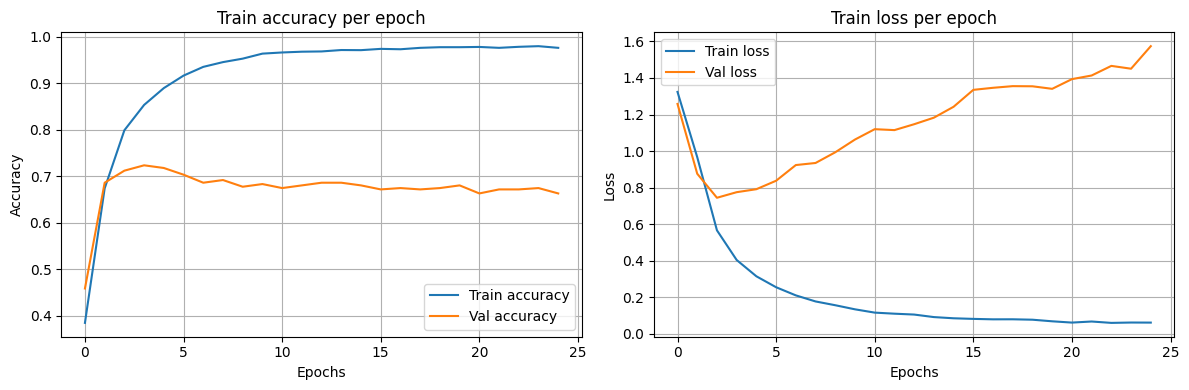

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取訓練記錄
df = pd.read_csv('training_log.csv')

# 建立子圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 繪製準確率圖
ax1.plot(df['epoch'], df['accuracy'], label='Train accuracy')
ax1.plot(df['epoch'], df['val_accuracy'], label='Val accuracy')
ax1.set_title('Train accuracy per epoch')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# 繪製損失圖 
ax2.plot(df['epoch'], df['loss'], label='Train loss')
ax2.plot(df['epoch'], df['val_loss'], label='Val loss')
ax2.set_title('Train loss per epoch')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


## Answer
This plot shows overfitting in the model.Training accuracy continues to increase, nearing 1, while validation accuracy and validation loss stop improving or worsen. This suggests that the model is overly reliant on the training data and has poor generalization to validation data.

There are some ways to improve the model.Increase the diversity of the training dataset.
Adjust Model Architecture or Reduce Complexity to simplify the model to prevent overfitting.
Or stop training early when the validation loss begins to deteriorate.

---

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [44]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

### 7.3 Generating word vector (embeddings)

In [45]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 2.8143564e-01,  3.2310754e-01,  9.0445103e-03,  2.0669264e-01,
       -4.5553005e-01, -1.1436386e+00,  5.7262480e-01,  1.4627342e+00,
       -7.3163772e-01, -4.3601623e-01, -6.9231951e-01, -7.4311286e-01,
       -5.2211457e-01,  3.0099037e-01, -2.9866666e-01, -2.7543622e-01,
        5.6658489e-01, -4.8257586e-01,  1.6459732e-01, -1.2544897e+00,
        8.6709797e-01,  6.3627589e-01,  8.4250784e-01, -2.4123766e-01,
        2.3913175e-01, -7.7063791e-02, -3.4861672e-01,  7.6810575e-01,
       -3.7493277e-01,  4.1731265e-01,  4.2921996e-01, -7.0625387e-02,
        6.3859028e-01, -2.7046227e-01, -4.8880488e-02,  5.3432435e-01,
        8.6733745e-04, -7.6144439e-01, -6.9233900e-01, -7.1593344e-01,
        4.4302264e-01,  2.4359034e-01,  7.9474203e-02,  5.9326845e-01,
        7.2614998e-01, -5.1376873e-01, -9.8126757e-01, -8.3856352e-02,
        3.3015358e-01,  2.0064998e-01, -2.3078971e-01,  2.6585808e-02,
        3.5321143e-01, -3.5236183e-01, -5.0896841e-01, -4.2756674e-01,
      

In [46]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9429651498794556),
 ('Really', 0.939015805721283),
 ("'be", 0.9275209307670593),
 ('Be', 0.9109934568405151),
 ('free', 0.9054448008537292),
 ('birthday', 0.904620885848999),
 ('cry', 0.9020209908485413),
 ('trusted', 0.899177074432373),
 ('plz', 0.8974933624267578),
 ('horny', 0.8959478139877319)]

In [47]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../input/google-news-vectors/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [48]:
def text_to_matrix(tokens, model, max_len):
    matrix = np.zeros((max_len, model.vector_size))
    for i, token in enumerate(tokens):
        if i >= max_len:
            break
        if token in model.wv:
            matrix[i] = model.wv[token]
    return matrix

# 設定最大文本長度
max_len = 10

# 將文本轉換為矩陣
train_df['text_matrix'] = train_df['text_tokenized'].apply(lambda x: text_to_matrix(x, word2vec_model, max_len))
X = np.array(train_df['text_matrix'].tolist())
y = train_df['emotion']

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [49]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [50]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7a796cbf4ca0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/opt/conda/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 1
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic6.png?raw=true)

In [51]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [52]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic7.png?raw=true)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic9.png?raw=true)


source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target


### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [53]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        


print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)


angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

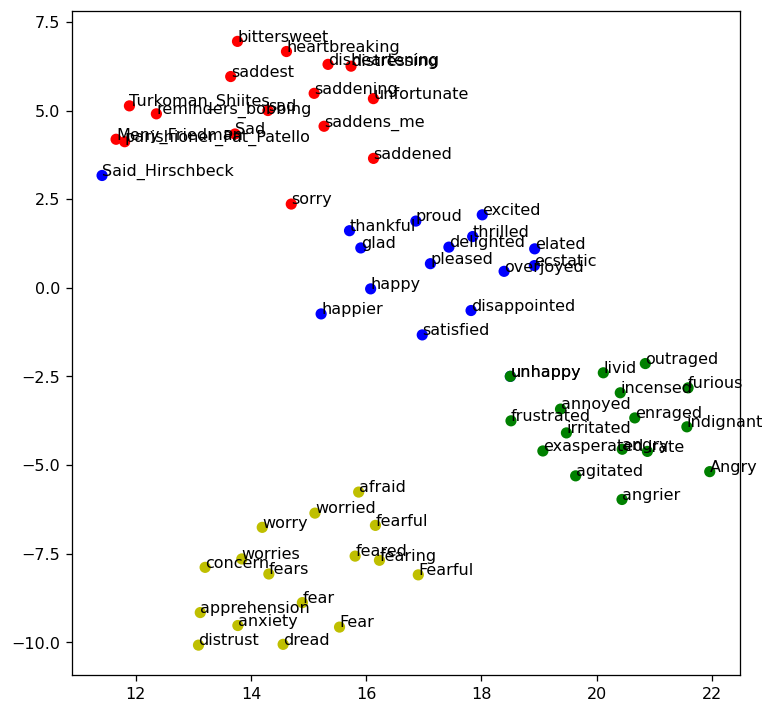

In [54]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

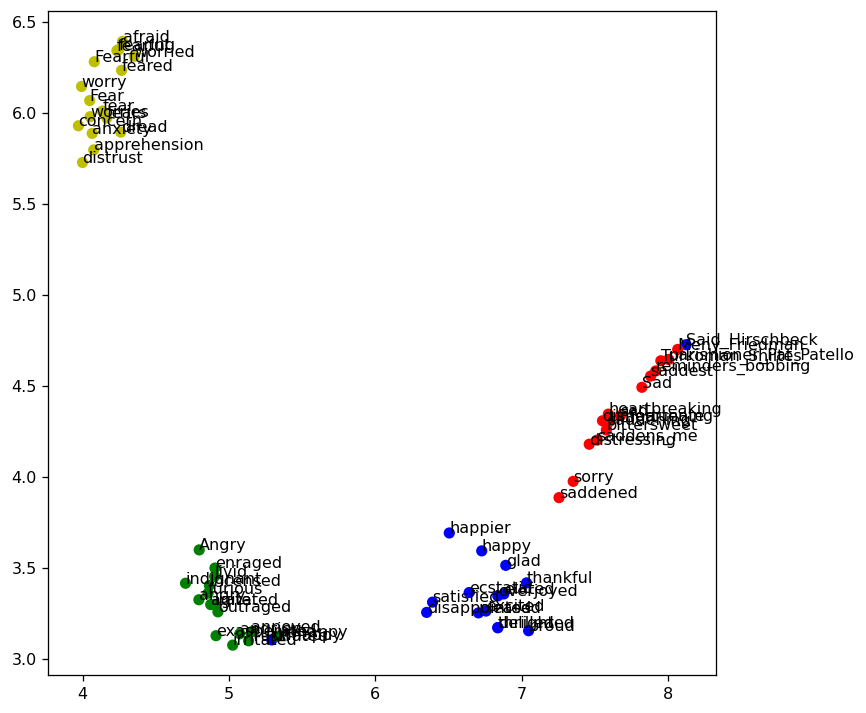

In [55]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Answer  
t-SNE (t-Distributed Stochastic Neighbor Embedding): Better preserves local structures but may produce some outliers, such as 'sorry' and 'Said_Hirschbeck' in the t-SNE plot.

UMAP (Uniform Manifold Approximation and Projection): Maintains both global and local structures and produces tighter clusters. Although it requires more computational resources, it is better suited for large-scale datasets.

Both visualization methods help us understand the distribution of emotion-related words in vector space, but UMAP typically provides clearer clu ter structus.

uctures.

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs: 
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:

![pic10.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic10.png?raw=true)


In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models: 
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**
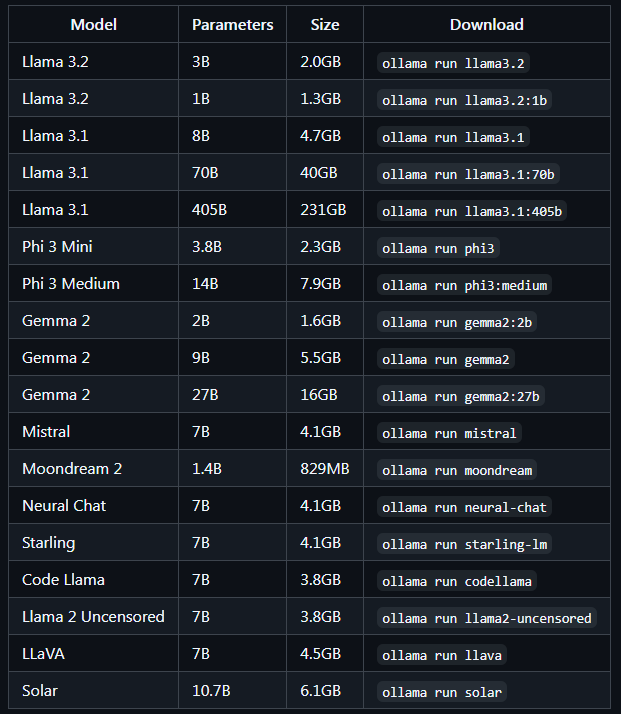

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [56]:
import ollama

messages = [
    {
        "role": "system",
        "content": "你是一位專業的程式碼審查者，專注於 Python 程式碼的安全性和效能問題。"
    },
    {
        "role": "user",
        "content": "請審查以下程式碼：\n\ndef read_file(filename):\n    f = open(filename)\n    data = f.read()\n    return data"
    }
]

response = ollama.chat(
    model='llama3.2',
    messages=messages
)

print(response['message']['content'])

time=2024-12-08T09:43:41.719Z level=INFO source=sched.go:714 msg="new model will fit in available VRAM in single GPU, loading" model=/root/.ollama/models/blobs/sha256-dde5aa3fc5ffc17176b5e8bdc82f587b24b2678c6c66101bf7da77af9f7ccdff gpu=GPU-c0af4b92-2a05-a05f-d97c-926720b53e72 parallel=4 available=15615524864 required="3.7 GiB"
time=2024-12-08T09:43:41.932Z level=INFO source=server.go:105 msg="system memory" total="31.4 GiB" free="24.1 GiB" free_swap="0 B"
time=2024-12-08T09:43:41.933Z level=INFO source=memory.go:356 msg="offload to cuda" layers.requested=-1 layers.model=29 layers.offload=29 layers.split="" memory.available="[14.5 GiB]" memory.gpu_overhead="0 B" memory.required.full="3.7 GiB" memory.required.partial="3.7 GiB" memory.required.kv="896.0 MiB" memory.required.allocations="[3.7 GiB]" memory.weights.total="2.4 GiB" memory.weights.repeating="2.1 GiB" memory.weights.nonrepeating="308.2 MiB" memory.graph.full="424.0 MiB" memory.graph.partial="570.7 MiB"
time=2024-12-08T09:43:41.

[GIN] 2024/12/08 - 09:43:59 | 200 | 18.028573109s |       127.0.0.1 | POST     "/api/chat"
程式碼審查結果：

**缺陷**

1. **未 Handling Exception**: 這個程式沒有處理任何异常情況，例如檔案不存在或無法開啟。這可能導致程式 crashed 或顯示錯誤訊息。
2. **未 Close 檔案**: 尽管程式用了 `f = open(filename)` 來對檔案進行操作，但是在程式中沒有關閉檔案。這可能會導致檔案不能被正確關閉，從而發生問題。
3. **無法處理非字串內容**: 這個程式通過 `f.read()` 來-read檔案的內容。如果檔案中包含非文字資料（例如圖像、音頻等），可能會導致程式錯誤或無法正確解碼。
4. **缺少型別注解**: 這個程式沒有任何型別注解，讓其他人難以理解程式的意義和功能。

**建議**

1. **使用try-except block**: 來處理可能發生的异常情況。
2. **使用with statement**: 來確保檔案被正確關閉，免於因為程式錯誤而忘記關閉檔案。
3. **添加型別注解**: 來提供更多的資訊和幫助其他人理解程式的意義和功能。

**修正後的程式**

```python
def read_file(filename: str) -> str:
    try:
        with open(filename, 'r') as f:
            data = f.read()
            return data
    except FileNotFoundError:
        print(f"檔案 '{filename}' 不存在")
        return None
    except Exception as e:
        print(f"錯誤：{e}")
        return None
```

這個修正的程式使用 `try-except block` 來處理可能發生的异常情況，包括檔案不存在和其他錯誤。它還使用 `with statement` 來確保檔案被正確關閉。


In [57]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

display(Markdown(response['message']['content']))

*some markdown* $\phi$

程式碼審查結果：

**缺陷**

1. **未 Handling Exception**: 這個程式沒有處理任何异常情況，例如檔案不存在或無法開啟。這可能導致程式 crashed 或顯示錯誤訊息。
2. **未 Close 檔案**: 尽管程式用了 `f = open(filename)` 來對檔案進行操作，但是在程式中沒有關閉檔案。這可能會導致檔案不能被正確關閉，從而發生問題。
3. **無法處理非字串內容**: 這個程式通過 `f.read()` 來-read檔案的內容。如果檔案中包含非文字資料（例如圖像、音頻等），可能會導致程式錯誤或無法正確解碼。
4. **缺少型別注解**: 這個程式沒有任何型別注解，讓其他人難以理解程式的意義和功能。

**建議**

1. **使用try-except block**: 來處理可能發生的异常情況。
2. **使用with statement**: 來確保檔案被正確關閉，免於因為程式錯誤而忘記關閉檔案。
3. **添加型別注解**: 來提供更多的資訊和幫助其他人理解程式的意義和功能。

**修正後的程式**

```python
def read_file(filename: str) -> str:
    try:
        with open(filename, 'r') as f:
            data = f.read()
            return data
    except FileNotFoundError:
        print(f"檔案 '{filename}' 不存在")
        return None
    except Exception as e:
        print(f"錯誤：{e}")
        return None
```

這個修正的程式使用 `try-except block` 來處理可能發生的异常情況，包括檔案不存在和其他錯誤。它還使用 `with statement` 來確保檔案被正確關閉。

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

In [58]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['../input/pictures/pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

time=2024-12-08T09:44:00.318Z level=INFO source=sched.go:507 msg="updated VRAM based on existing loaded models" gpu=GPU-401d4841-c662-ce8c-49d7-0e62e2912edf library=cuda total="14.7 GiB" available="880.1 MiB"
time=2024-12-08T09:44:00.318Z level=INFO source=sched.go:507 msg="updated VRAM based on existing loaded models" gpu=GPU-c0af4b92-2a05-a05f-d97c-926720b53e72 library=cuda total="14.7 GiB" available="11.0 GiB"
time=2024-12-08T09:44:00.321Z level=INFO source=sched.go:714 msg="new model will fit in available VRAM in single GPU, loading" model=/root/.ollama/models/blobs/sha256-377876be20bac24488716c04824ab3a6978900679b40013b0d2585004555e658 gpu=GPU-c0af4b92-2a05-a05f-d97c-926720b53e72 parallel=4 available=11855958016 required="10.4 GiB"
time=2024-12-08T09:44:00.550Z level=INFO source=server.go:105 msg="system memory" total="31.4 GiB" free="23.7 GiB" free_swap="0 B"
time=2024-12-08T09:44:00.553Z level=INFO source=memory.go:356 msg="offload to cuda" projector.weights="579.5 MiB" projecto

[GIN] 2024/12/08 - 09:44:06 | 200 |  6.552634932s |       127.0.0.1 | POST     "/api/chat"


In the heart of a verdant landscape, a Shiba Inu dog takes flight. The dog's fur, a mix of tan and white, contrasts beautifully with its brown tail that is caught mid-air in an acrobatic leap. Its eyes are wide open, perhaps alert or excited about something in the distance.

The backdrop to this lively scene is a grassy field under a clear blue sky. The grass stretches out into the distance where it meets another dog, smaller and further away. Beyond them, trees stand tall against the azure expanse of the sky. This serene setting provides a stark contrast to the energetic display of agility by our main subject.

The image captures a moment frozen in time, showcasing not just the physical attributes of the Shiba Inu but also hinting at its lively and playful nature.

In [59]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['../input/pictures/pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

[GIN] 2024/12/08 - 09:44:11 | 200 |  4.731266803s |       127.0.0.1 | POST     "/api/chat"


The image presents a scene of tranquility featuring a tabby cat as the main subject. The cat, adorned in its classic striped pattern, stands confidently on all fours against a stark white background. Its tail, slightly raised, adds a touch of liveliness to the otherwise serene setting. 

The cat's eyes are focused upwards and to the left, as if something has caught its attention. Perhaps it's looking at the camera or an unseen object just out of frame. The expression on its face is one of curiosity, adding a layer of intrigue to the image.

Despite the simplicity of the scene, there's a certain charm to it. The cat's positioning and gaze create a sense of connection with the viewer, inviting us into this quiet moment captured in time. The white background further accentuates the cat, making it stand out prominently. 

Overall, the image beautifully captures a simple yet captivating moment in the life of this tabby cat.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

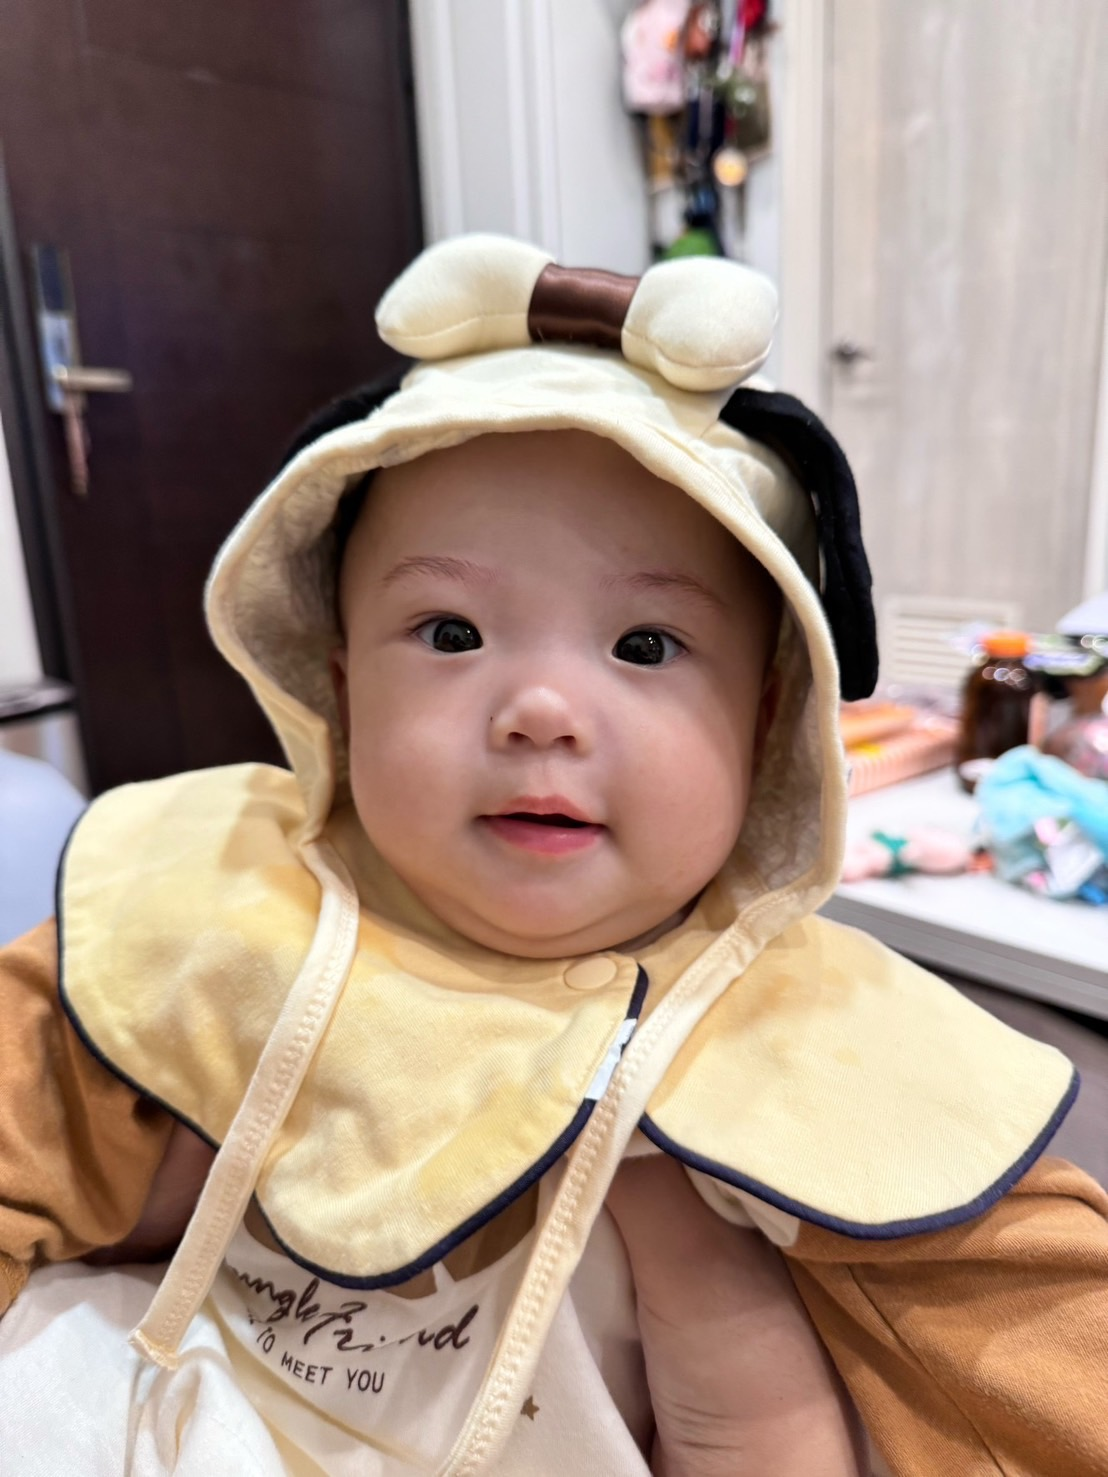

In [60]:
from IPython.display import Image
import os
Image('../input/picture/S__122224653.jpg')

In [61]:
import ollama
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['../input/picture/S__122224653.jpg'] #Image with a baby
    },
])

display(Markdown(response3['message']['content']))

[GIN] 2024/12/08 - 09:44:17 | 200 |  4.950475858s |       127.0.0.1 | POST     "/api/chat"


In the heart of a cozy kitchen, a baby is the center of attention. The baby, adorned in a yellow onesie with blue cuffs and collar, has a beige hat that matches their attire. The hat features two white bows on either side, adding a touch of charm to the ensemble. 

The baby's face is lit up with curiosity as they gaze directly into the camera, creating an endearing connection with the viewer. Their tiny hands are gently held by an adult, whose identity remains unseen in this snapshot of time.

In the background, the kitchen unfolds with its typical charm. A white countertop houses various objects, suggesting a space well-used and lived-in. A pink toy and a yellow bowl can be spotted among these items, hinting at the baby's playtime moments. Next to them stands a blue bottle, perhaps holding something refreshing for later.

The image captures an everyday moment filled with warmth and love, as seen through the lens of this kitchen scene.

## Answer
The picture description is very accurate, including that the main character in the photo is a baby, and the description includes the baby's clothing and expression. The background of the photo was also described very clearly, and even though the resolution was not high, he could still deduce some information. However, he provides too much unimportant photo information.

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [62]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

/tmp/ipykernel_23/3929822569.py:22: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model


[GIN] 2024/12/08 - 09:44:19 | 200 |  101.519546ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:20 | 200 |  119.942856ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:20 | 200 |   78.559164ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:20 | 200 |  107.500049ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:20 | 200 |    60.77656ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:20 | 200 |   55.056988ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:20 | 200 |   91.147909ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:20 | 200 |   69.185437ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:20 | 200 |   61.043559ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:20 | 200 |   46.528918ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:20 | 

IBM has developed several solutions related to Large Language Models (LLMs) to enhance its natural language understanding (NLU) and natural language processing (NLP) capabilities, including:

1. **Watsonx**: A cloud-based platform that provides access to IBM's Granite model series, which serves as the generative AI backbone for other IBM products like Watsonx Assistant and Watsonx Orchestrate.
2. **Watsonx Assistant**: An AI-powered chatbot that uses LLMs to understand and respond to user queries in a human-like manner.
3. **Watsonx Orchestrate**: A platform that enables the development of custom AI solutions using IBM's Granite model series.
4. **Granite model series**: A range of models developed by IBM for NLP and text generation tasks, including language translation, summarization, and question answering.

These solutions leverage LLMs to provide a wide range of capabilities, including:

* Text generation: generating human-like text for various applications such as email writing, blog posts, or other mid-to-long form content.
* Natural Language Understanding (NLU): enabling systems to comprehend human language and extract insights from unstructured data.
* Natural Language Processing (NLP): facilitating the processing of human language to generate meaningful results.

IBM's LLM solutions are designed to support various business functions and use cases, including:

* Customer service and support
* Content generation and optimization
* Language translation and localization
* Sentiment analysis and opinion mining
* Text summarization and summarist

Overall, IBM's LLM solutions aim to help organizations streamline processes, improve customer experiences, and enable more efficient decision-making.


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [63]:
import requests
from bs4 import BeautifulSoup
import ollama
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2"  # You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(urls):
    all_retrievers = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs = loader.load()  # Load the URL that will serve as our data source
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)  # Divide the URL in chunks of text for easier comparison in the vector space
        splits = text_splitter.split_documents(docs)
        embeddings = OllamaEmbeddings(model=llm_model)  # Generating embeddings with our chosen model
        vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)  # Our vector space for comparison
        all_retrievers.append(vectorstore.as_retriever())
    return all_retrievers

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model=llm_model, messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question, retrievers):
    all_retrieved_docs = []
    for retriever in retrievers:
        retrieved_docs = retriever.invoke(question)
        all_retrieved_docs.extend(retrieved_docs)
    formatted_context = format_docs(all_retrieved_docs)
    return ollama_llm(question, formatted_context)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)  # Format the retrieved docs in an orderly manner for prompting

def main():
    # 直接指定三個 URL
    urls = [
        "https://zh.wikipedia.org/wiki/人工智能",
        "https://zh.wikipedia.org/wiki/機器學習",
        "https://zh.wikipedia.org/wiki/深度學習"
    ]
    
    # Create the retrievers
    retrievers = load_and_retrieve_docs(urls)
    
    # 提出三個問題
    questions = [
        "什麼是人工智能？",
        "機器學習的主要類型有哪些？",
        "深度學習和傳統機器學習有什麼區別？"
    ]
    
    for i, question in enumerate(questions):
        answer = rag_chain(question, retrievers)
        print(f"\nQuestion {i+1}: {question}")
        print(f"Answer: {answer}\n")

if __name__ == "__main__":
    main()

[GIN] 2024/12/08 - 09:44:29 | 200 |  240.346173ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:29 | 200 |  125.513265ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:29 | 200 |  319.527174ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:30 | 200 |  197.469248ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:30 | 200 |  307.747113ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:30 | 200 |  112.007223ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:30 | 200 |  250.291619ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:30 | 200 |  222.284996ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:31 | 200 |  414.929822ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:31 | 200 |  123.810437ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:44:31 | 

time=2024-12-08T09:45:01.336Z level=WARN source=runner.go:129 msg="truncating input prompt" limit=2048 prompt=5891 keep=5 new=2048


[GIN] 2024/12/08 - 09:45:09 | 200 |  8.575134827s |       127.0.0.1 | POST     "/api/chat"

Question 1: 什麼是人工智能？
Answer: 以下是一些關於人工智能的基本概念和相關資訊：

**定义**

* 人工智能（Artificial Intelligence, AI）：指由人類設計、開發和建造的智能系統，可以模仿或超越人类某些能力，例如学习、推理、decision-making等。

**子領域**

* 机器学习（Machine Learning）：让机器从使用者和输入数据中获得知识，从而可以自动地判断和输出相应的结果。
* 自然语言处理（Natural Language Processing, NLP）：探討如何處理及運用自然語言，包括语法、 semantics、语意等方面的研究。

**方法**

* 監視式机器学习：通过监视数据和环境变化来改进模型。
* 非监督式机器学习：不给定训练样本，而是直接根据规则进行分类或预测。
* 模式识别（Pattern Recognition）：用于识别和分类数据，包括类别和回归。

**应用**

* 语音识别
* 自动驾驶
* 机器人智能
* 语言翻译
* 医疗诊断

**挑战**

* 如何让机器理解人类意图和情绪。
* 如何处理无序、脆弱的数据。
* 如何确保机器学习模型的安全性和透明度。

**未来发展方向**

* 机器学习的应用扩展到更多领域，如医学、Finance、环境监测等。
* 自然语言处理的 advancements 以及人类-机器交互的研究。
* 人工智能的集成化，多AGENT系统和复杂系统的研究。

[GIN] 2024/12/08 - 09:45:09 | 200 |   25.951081ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:09 | 200 |   23.961741ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:09 | 200 |   23.049323ms |       

time=2024-12-08T09:45:10.009Z level=WARN source=runner.go:129 msg="truncating input prompt" limit=2048 prompt=6237 keep=5 new=2048


[GIN] 2024/12/08 - 09:45:12 | 200 |  2.074383999s |       127.0.0.1 | POST     "/api/chat"

Question 2: 機器學習的主要類型有哪些？
Answer: 这是关于人工智能（AI）的文本，涵盖了其定义、研究领域、技术问题、核心问题、弱人工智慧、通用人工智能以及各种应用领域。

[GIN] 2024/12/08 - 09:45:12 | 200 |   28.048528ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:12 | 200 |   25.909609ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:12 | 200 |   24.511756ms |       127.0.0.1 | POST     "/api/embeddings"


time=2024-12-08T09:45:12.191Z level=WARN source=runner.go:129 msg="truncating input prompt" limit=2048 prompt=6242 keep=5 new=2048


[GIN] 2024/12/08 - 09:45:13 | 200 |  1.769259307s |       127.0.0.1 | POST     "/api/chat"

Question 3: 深度學習和傳統機器學習有什麼區別？
Answer: 人工智能是一種在 computers 上創建出能夠模擬人類智能的軟件或 hardware 系統。



### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [64]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [65]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

[GIN] 2024/12/08 - 09:45:14 | 200 |   31.970138ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:14 | 200 |   34.041266ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:14 | 200 |    26.81739ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:14 | 200 |   28.118339ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:14 | 200 |   28.581556ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:14 | 200 |    29.56979ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:14 | 200 |   25.878189ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:14 | 200 |   36.883566ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:14 | 200 |   29.073836ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:14 | 200 |   29.950749ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:45:14 | 

In [66]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

[GIN] 2024/12/08 - 09:47:13 | 200 |   31.653474ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:47:13 | 200 |    31.10207ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:47:13 | 200 |   34.663945ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:47:13 | 200 |   30.275406ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:47:13 | 200 |   32.339326ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:47:13 | 200 |   35.109726ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:47:13 | 200 |   27.392964ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:47:13 | 200 |   27.238674ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:47:13 | 200 |   33.528254ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:47:13 | 200 |   26.067474ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/08 - 09:47:13 | 

In [67]:
df_train #We can see the new column with the embeddings 

,id,text,emotion,intensity,text_tokenized,text_matrix,embeddings
525,10525,@DL_Hart @DonnieDollars @AaronBiggsPro @WWENoW...,anger,0.462,"[@, DL_Hart, @, DonnieDollars, @, AaronBiggsPr...","[[-1.427993655204773, 0.15450552105903625, 0.1...","[-1.6631495952606201, 0.6685523986816406, -1.8..."
1789,20932,@GreensACT @ShaneRattenbury @carolinelec what ...,fear,0.312,"[@, GreensACT, @, ShaneRattenbury, @, caroline...","[[-1.427993655204773, 0.15450552105903625, 0.1...","[-0.3723669648170471, 1.9882174730300903, 1.67..."
755,10755,I wish the next madden has a story mode too. J...,anger,0.312,"[I, wish, the, next, madden, has, a, story, mo...","[[-0.08829502761363983, 0.8200171589851379, -0...","[0.31236764788627625, 2.551351308822632, -0.96..."
2238,30234,In ever use to like smiling until I realized h...,joy,0.613,"[In, ever, use, to, like, smiling, until, I, r...","[[-0.1448909044265747, 0.415204256772995, 0.02...","[-0.5891319513320923, -0.6643127799034119, 3.9..."
558,10558,@kingcharles9th i Lowkey forgot you had twitte...,anger,0.417,"[@, kingcharles9th, i, Lowkey, forgot, you, ha...","[[-1.427993655204773, 0.15450552105903625, 0.1...","[0.8193746209144592, -0.9748198390007019, 0.63..."
...,...,...,...,...,...,...,...
746,10746,"@MHChat sadness with resentment is the past, s...",anger,0.172,"[@, MHChat, sadness, with, resentment, is, the...","[[-1.427993655204773, 0.15450552105903625, 0.1...","[0.33485403656959534, 0.05335380136966705, 2.0..."
2700,30696,"No, just tweet pictures of four fictional char...",joy,0.271,"[No, ,, just, tweet, pictures, of, four, ficti...","[[-0.4039078950881958, 0.5880545377731323, 0.0...","[-0.8348435163497925, 0.29152315855026245, 3.2..."
658,10658,@GreyTheTick But even if I jumped through that...,anger,0.375,"[@, GreyTheTick, But, even, if, I, jumped, thr...","[[-1.427993655204773, 0.15450552105903625, 0.1...","[0.46957579255104065, 1.4682061672210693, -1.6..."
314,10314,@IrishTimesPol @IrishTimes Irish citizens boil...,anger,0.542,"[@, IrishTimesPol, @, IrishTimes, Irish, citiz...","[[-1.427993655204773, 0.15450552105903625, 0.1...","[0.7302792072296143, 1.2146283388137817, -2.45..."


In [68]:
df_test #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings
285,40798,@kayleighmcenany @DonaldJTrumpJr Is that real...,sadness,0.625,"[0.3169879913330078, 0.8274886608123779, 2.755..."
36,10893,@pbhushan1 @IndianExpress so in your opinion i...,anger,0.526,"[0.01551832351833582, 1.173563003540039, 0.206..."
62,10919,"Why to have vanity sizes?Now sizes S,XS(evenXX...",anger,0.708,"[1.4544349908828735, -1.030888557434082, 2.474..."
235,30864,@diehimbeertonis She developed her 'forced smi...,joy,0.208,"[-1.720294713973999, 0.05937730520963669, -2.2..."
99,21162,"@madhav_pastey moral of the story, never check...",fear,0.354,"[-0.2645465135574341, 1.4138386249542236, 3.58..."
...,...,...,...,...,...
120,21183,Nothing worse than an uber driver that can't d...,fear,0.688,"[-0.466753214597702, 2.7234790325164795, 0.468..."
335,40848,It's basically a dead skin peel which sounds g...,sadness,0.354,"[-0.8462122082710266, -0.26945051550865173, -1..."
44,10901,You're so thirsty for the chance to disagree w...,anger,0.500,"[-0.5093241930007935, 1.744971752166748, -2.24..."
101,21164,@All4 is the android app it designed to be bug...,fear,0.520,"[-0.975700318813324, 2.248974323272705, 3.0902..."


In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [70]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [71]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.45821325648414984


In [72]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.41      0.44      0.42        84
        fear       0.50      0.53      0.52       110
         joy       0.45      0.43      0.44        79
     sadness       0.45      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



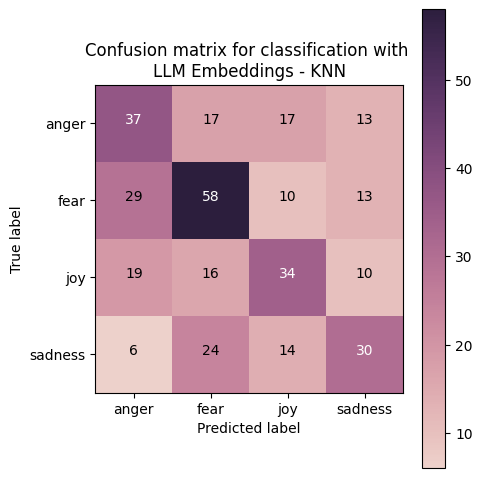

In [73]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [74]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [75]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [76]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [77]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [78]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)  
y_test_llama = label_encode(label_encoder, y_test)

In [79]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [80]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.3696 - loss: 1.4447 - val_accuracy: 0.5591 - val_loss: 1.0959
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - loss: 0.8695 - val_accuracy: 0.5620 - val_loss: 1.1289
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7199 - loss: 0.7100 - val_accuracy: 0.5821 - val_loss: 1.1134
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.5563 - val_accuracy: 0.5764 - val_loss: 1.2332
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8419 - loss: 0.4318 - val_accuracy: 0.5014 - val_loss: 1.4352
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.3881 - val_accuracy: 0.5504 - val_loss: 1.3956
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9026 - loss: 0.2742 - val_accuracy: 0.5562 - val_loss: 1.5939
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9123 - loss: 0.2483 - val_accuracy: 0

In [82]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


array([[1.3518122e-07, 6.9624394e-07, 2.6658711e-07, 9.9999893e-01],
       [8.5996272e-04, 9.8653108e-01, 1.2533990e-02, 7.4908596e-05],
       [9.9997222e-01, 1.9476717e-07, 7.4758610e-08, 2.7412068e-05],
       [2.9697832e-05, 1.2341405e-04, 9.9856865e-01, 1.2783207e-03],
       [3.5377894e-07, 5.7293801e-04, 9.9927610e-01, 1.5066673e-04]],
      dtype=float32)

In [83]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'fear', 'anger', 'joy', 'joy'], dtype=object)

In [84]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.57


In [85]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.449765,1.251326,0.559078,1.095872
1,1,0.647661,0.874220,0.561960,1.128877
2,2,0.725159,0.698511,0.582133,1.113379
3,3,0.778024,0.577085,0.576369,1.233241
4,4,0.826737,0.461202,0.501441,1.435193
5,5,0.857182,0.389313,0.550432,1.395638
6,6,0.892056,0.301510,0.556196,1.593931
7,7,0.903128,0.265604,0.567723,1.610933
8,8,0.915859,0.237921,0.512968,1.925428
9,9,0.922225,0.215958,0.570605,1.756764


In [86]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.60      0.55      0.57        84
        fear       0.72      0.53      0.61       110
         joy       0.53      0.67      0.59        79
     sadness       0.45      0.54      0.49        74

    accuracy                           0.57       347
   macro avg       0.57      0.57      0.57       347
weighted avg       0.59      0.57      0.57       347



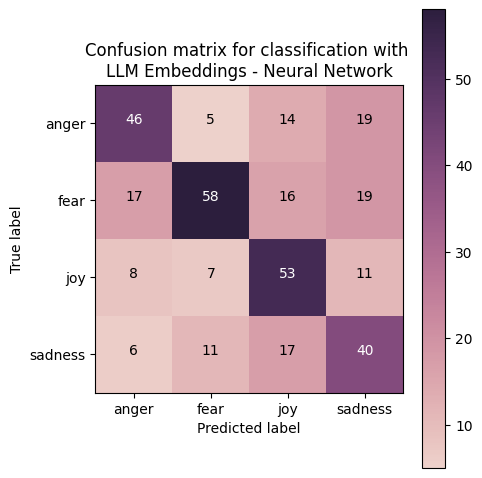

In [87]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

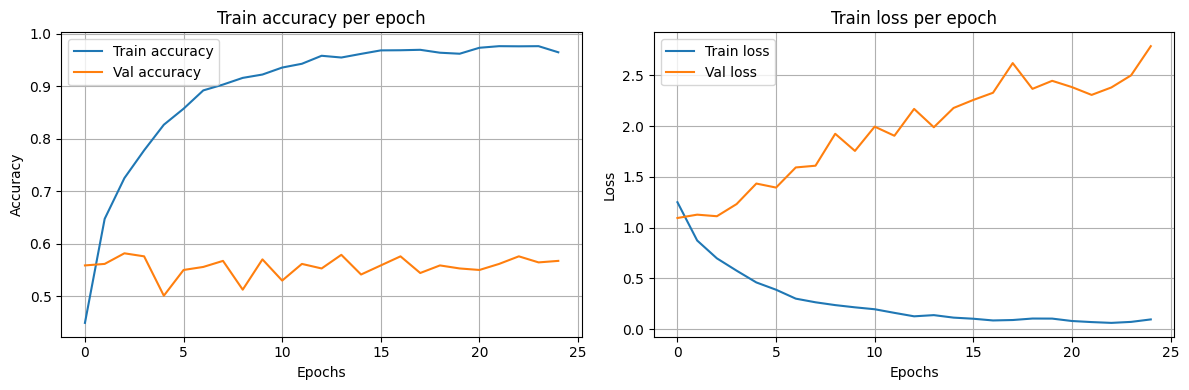

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取訓練記錄
df = pd.read_csv('training_log_2.csv')

# 建立子圖
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 繪製準確率圖
ax1.plot(df['epoch'], df['accuracy'], label='Train accuracy')
ax1.plot(df['epoch'], df['val_accuracy'], label='Val accuracy')
ax1.set_title('Train accuracy per epoch')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# 繪製損失圖 
ax2.plot(df['epoch'], df['loss'], label='Train loss')
ax2.plot(df['epoch'], df['val_loss'], label='Val loss')
ax2.set_title('Train loss per epoch')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


* BOW+Decision Trees Accuracy:0.66
* BOW+Naive_Bayes Accuracy:0.71
* BOW+NN Accuracy:0.66
* LLM Embeddings+NN Accuracy: 0.56
* LLM Embeddings+KNN Accuracy:0.46  
  
By comparing the results of the KNN and CNN models, we can see that the CNN model using LLM embeddings may perform better in terms of accuracy and F1-Score than KNN. CNN models can capture local features in the text, thereby enhancing classification performance. However, the accuracy is lower compared to other models, possibly because the model has overfitting problems..66


### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [89]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2" 

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


[GIN] 2024/12/08 - 09:47:46 | 200 |  178.897184ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 09:47:46 | 200 |   86.824255ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 09:47:46 | 200 |   72.211395ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 09:47:46 | 200 |   72.514179ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 09:47:46 | 200 |   62.610925ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 09:47:46 | 200 |   71.001653ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 09:47:46 | 200 |   70.623127ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 202

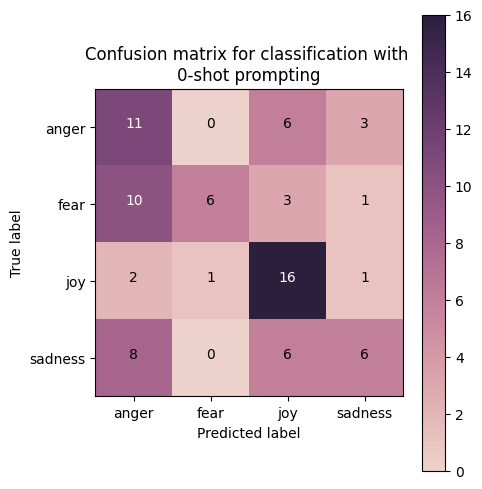

In [90]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @mandyjohnson I'll be honest.. I hope that annoying Southern bint with the 'look at me' pout goes out this week! Selasi #FTW
Emotion: anger

Text: @David_Stepp Any other election, fine vote 3rd party as useless as it is but not this one. I hesitate to say it'd be selfish but...
Emotion: fear

Text: The human race has one really effective weapon, and that is laughter. -- Mark Twain
Emotion: joy

Text: When you have 15 doe run the opposite side of you 🙁 
Emotion: sadness


[GIN] 2024/12/08 - 09:47:52 | 200 |   134.89051ms |       127.0.0.1 | POST     "/api/chat"
[GIN] 2024/12/08 - 09:47:52 | 200 |   81.025475ms |       127.0

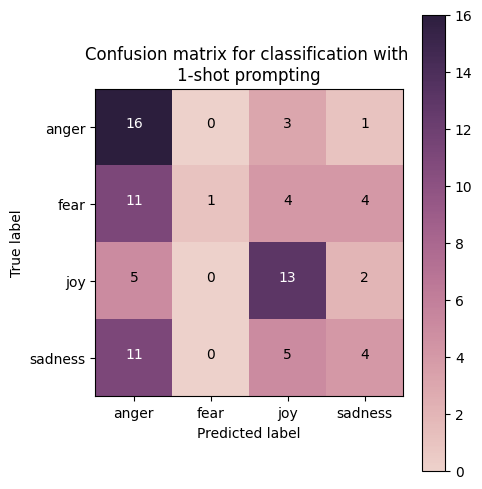

In [91]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: @mandyjohnson I'll be honest.. I hope that annoying Southern bint with the 'look at me' pout goes out this week! Selasi #FTW
Emotion: anger

Text: @thomeagle Just to help maintain and boost our status as a world class centre for education, culture and tolerance. 
Emotion: anger

Text: 630am meeting Olympic House #10golds24 .  #neverquit #believe #dreambig #TeamTTO #going4gold
Emotion: anger

Text: I should really study today for chemistry but playing madden is just way more fun.
Emotion: anger

Text: Love the new song I can't stop thinking about you by .
Emotion: anger

Text: @David_Stepp Any other election, fine vote 3rd 

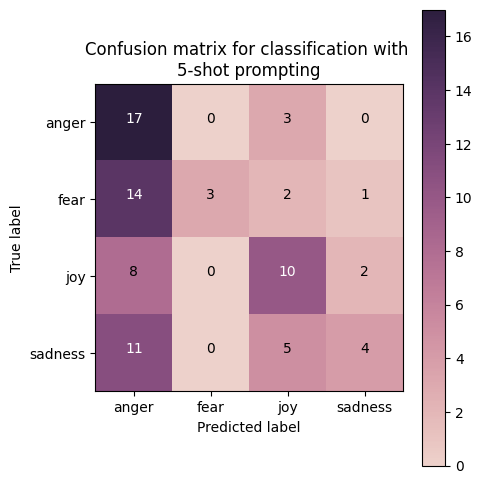

In [92]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

We found that the accuracy did not increase due to the increase in sample classification, possibly because the amount of data was insufficient (each emotion only having 20 sample) to fully learn the category features.This situation is more obvious in the sample of sadness, which originally had a smaller number of samples, and is the main source of low accuracy.

---